In [1]:
#Author: Cong Zhu, Wanqi Chen
#Date: 2020/12
from urllib.request import urlopen, urlretrieve
import time
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import csv
import requests
import math
import datetime

## 1. Craw PubMed Publications given specified key word(s) and timeframe
The function return two dataframes: 1) abstract dataframe (PMID,title,abstract,publication date) 2) authors dataframe in long format (PMID, author names)

In [2]:
'''modify the pathway as necessary'''
os.getcwd()

'/Users/wq/Google Drive/PH1975 Project'

In [3]:
import pub_retrieve_thread as pr

### 1.1 Extract records and save into two data files that store abstract information and author information

In [ ]:
abstract_tab, author_tab = pr.pubmed_record().pub_tab_all_main()

In [7]:
abstract_tab.shape

(492, 4)

In [8]:
author_tab.shape

(5181, 2)

In [9]:
abstract_tab.head()

,Title,PMID,Publication Date,Abstract
0,[Stereotactic body radiotherapy: Passing fad o...,31864665,2020/2/01,Stereotactic body radiotherapy (SBRT) is a you...
0,Status and innovations in pre-treatment CT ima...,31642709,2020/3/01,Pre-treatment CT imaging is a topic of growing...
0,HDR Prostate Brachytherapy,31727300,2020/1/01,Brachytherapy has become an essential pillar i...
0,Image-Guided Gynecologic Brachytherapy for Cer...,31727296,2020/1/01,The incorporation of magnetic resonance imagin...
0,Alternatives to Surgery for Early-Stage Non-Sm...,32402355,2020/6/01,Lung cancer is the leading cause of cancer dea...


In [10]:
author_tab.head()

,PMID,Authors
0,31864665,Alexis Vallard
1,31864665,Nicolas Vial
2,31864665,Omar Jmour
3,31864665,Amel Rehailia-Blanchard
4,31864665,Jane-Chloé Trone


### 1.2 Save as csv 

In [9]:
author_tab.to_csv("author_tab.csv")
abstract_tab.to_csv("abstract_tab.csv")

## 2. Create SQL database and extract publication information by author names

In [10]:
import sql_dump as sdp

### 2.1 Load csv files and convert them into SQL databases

In [11]:
sdp.sql_dump('author_tab.csv', 'abstract_tab.csv')

author_tab.db is created
abstract_tab.db is created


C:\Users\M-U-h\anaconda3\envs\Analyses\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


### 2.2 Extract publication records by author names from SQL database
Extracted information is saved as csv file give entered information

In [14]:
pick_authors = sdp.pick_authors('Sarah Hazell','Xia Jiang','X Jiang','Mary B Daly')

In [15]:
pick_authors.pub_rec("Extract_records")

In [17]:
'''check results'''
pub_check = pd.read_csv("Extract_records.csv")
pub_check.head()

,Title,PMID,Author Name,Abstract
0,Image-Guided Gynecologic Brachytherapy for Cer...,31727296,Sarah Hazell,The incorporation of magnetic resonance imagin...
1,Fine-mapping of 150 breast cancer risk regions...,31911677,Xia Jiang,Genome-wide association studies have identifie...
2,Fine-mapping of 150 breast cancer risk regions...,31911677,Mary B Daly,Genome-wide association studies have identifie...


## 3. Visualization

In [4]:
import visualization as vs

### 3.1 Read .csv file

In [5]:
abstract_tab = vs.read_csv("abstract_tab.csv")

### 3.2 Bar plot by month

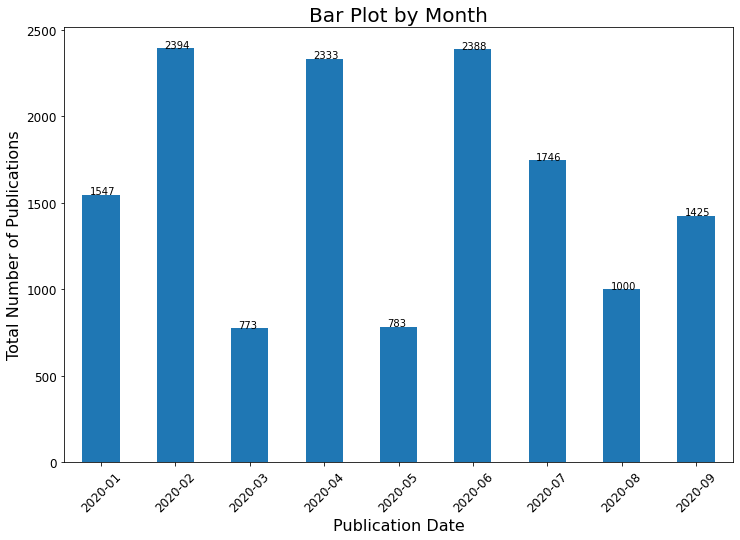

In [6]:
vs.bar_plot(abstract_tab, rotation=45)

### 3.3 Line plot by month 

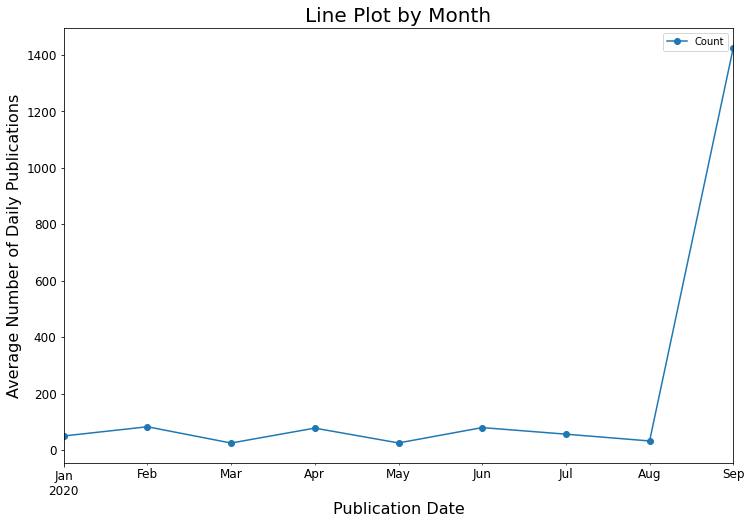

In [7]:
vs.line_plot(abstract_tab)

### 3.4 Table of descriptive statistics

In [8]:
vs.describe(abstract_tab)

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
2020-01,31.0,49.903226,168.521483,1.0,10.00,22.0,28.50,956.0
2020-02,29.0,82.551724,315.354629,3.0,17.00,23.0,30.00,1720.0
2020-03,31.0,24.935484,15.935151,2.0,16.00,22.0,34.00,84.0
2020-04,30.0,77.766667,289.988547,1.0,13.25,23.5,32.75,1610.0
2020-05,31.0,25.258065,18.165843,2.0,11.50,26.0,32.00,97.0
2020-06,30.0,79.600000,289.986754,4.0,14.00,28.5,33.00,1612.0
2020-07,31.0,56.322581,141.696951,5.0,19.00,31.0,40.50,810.0
2020-08,31.0,32.258065,17.252957,2.0,23.00,34.0,42.50,79.0
2020-09,1.0,1425.000000,NaN,1425.0,1425.00,1425.0,1425.00,1425.0
